In [3]:
# IMPORT ALL THE LIBRARIES USED IN THE NOTEBOOK
import math
import plotly.subplots as psu
import matplotlib.pyplot as plt
from waffles.data_classes.WaveformSet import WaveformSet
from waffles.data_classes.Waveform import Waveform
import numpy as np
from waffles.input.pickle_file_to_WaveformSet import pickle_file_to_WaveformSet
from glob import glob
# from waffles.np04_utils.test import TEST

In [4]:
from waffles.np04_data.tau_slow_runs.load_runs_csv import ReaderCSV
import re
dfcsv = ReaderCSV()
whichtypes = ['purity', 'beam']
whichtypes = ['purity']
whichtypes = ['beam']
accepted_runs = []
for dt in whichtypes:
    accepted_runs += list(dfcsv.dataframes[dt]['Run'].to_numpy())
ch = 11114
filesresponse = sorted(glob(f'/eos/home-h/hvieirad/waffles/analysis/responses/*_ch{ch}.pkl'))
p = re.compile("run0(.....)_ch(.....).pkl")

wfsets = {}
for f in filesresponse[None:]:
    m = p.search(f)
    run = int(m.group(1))
    if run in accepted_runs:
        wfset = pickle_file_to_WaveformSet(f)
        wfsets[run] = wfset


12
96
1119


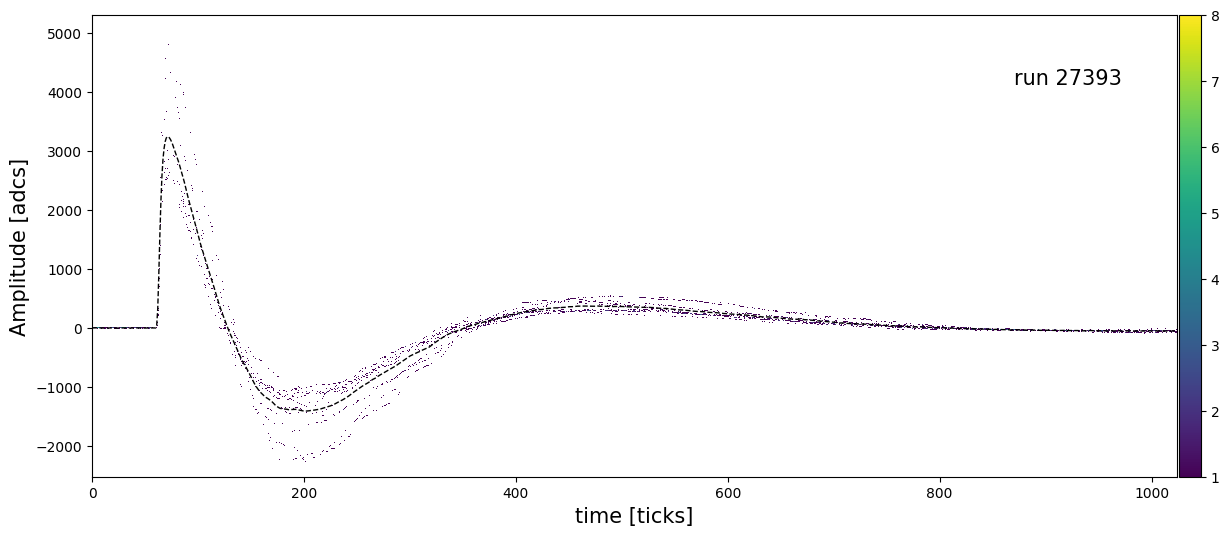

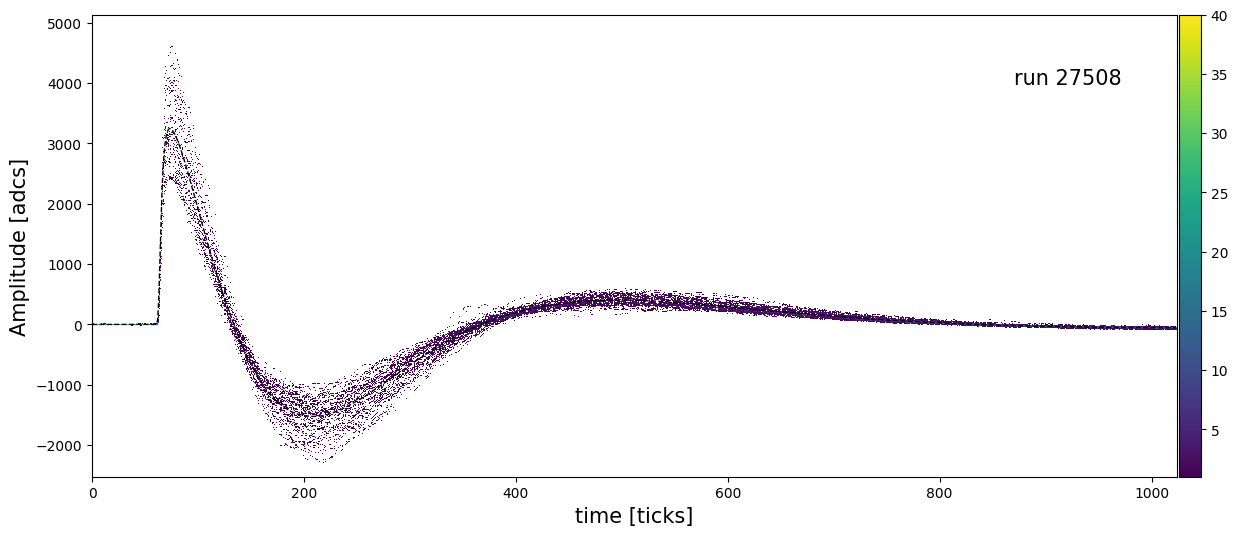

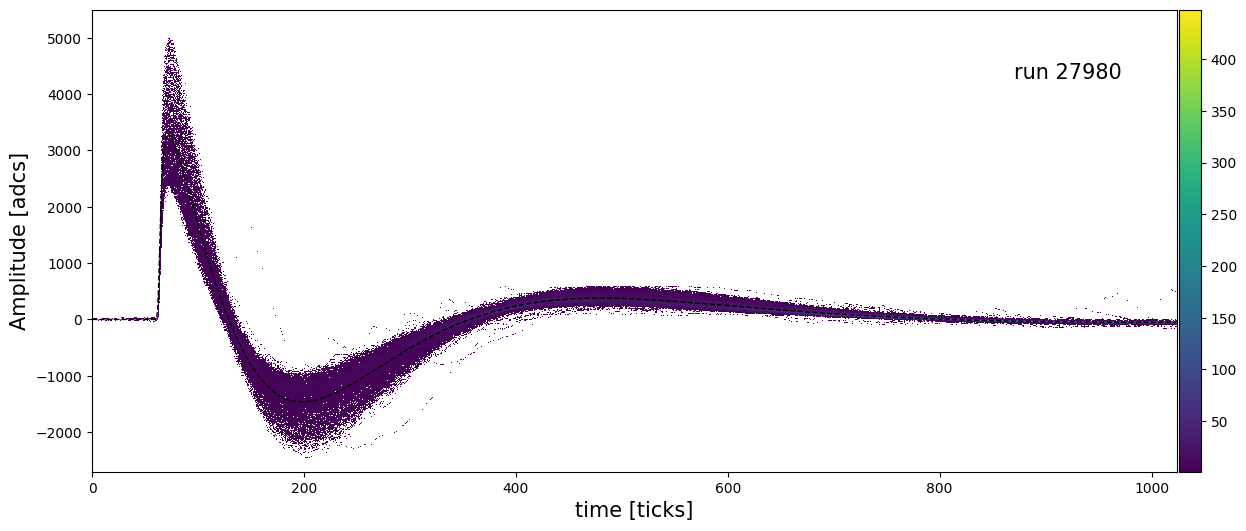

In [18]:
def persistence_plot(wfset_ch:WaveformSet, runnumber:int):
    times = np.linspace(0, len(wfset_ch.waveforms[0].adcs),len(wfset_ch.waveforms[0].adcs))
    max=None
    if (len(wfset_ch.waveforms)> 5000):
        max = 5000
    wvf_arrays = np.array([(waveform.adcs.astype(np.float32) - waveform.baseline)*-1 for waveform in wfset_ch.waveforms[:max]])
    time_arrays = np.tile(times, (len(wvf_arrays), 1))
    maxofall = np.max(wvf_arrays)*1.1
    minofall = np.min(wvf_arrays)*1.1

    h, yedges, xedges = np.histogram2d(wvf_arrays.flatten(), time_arrays.flatten(), bins=(2000,1024), range = [[minofall,maxofall],[0,1024]])
    h[h==0] = np.nan
    fig, ax = plt.subplots(1, 1, figsize=(14,6))

    x, y = np.meshgrid(xedges, yedges)
    pcm = ax.pcolormesh(x, y, h)
    ax.set_ylabel("Amplitude [adcs]", fontsize=15)
    ax.set_xlabel("time [ticks]", fontsize=15)
    cax = ax.inset_axes([1.002, 0., 0.02, 1.])
    plt.colorbar(pcm, ax=ax, cax=cax)
    plt.text(0.85,0.85,f'run {runnumber}', transform=ax.transAxes, fontsize=15)

    avgwvf = wfset_ch.avgwvf
    plt.plot(avgwvf, '--k', lw=1)


for r, wf in list(wfsets.items())[:3]:
    # if r == 26491 or r == 27947 or r == 28209:
    # if r == 29180:
        persistence_plot(wf,r)
        print(len(wf.waveforms))
        # plt.xlim(0,120)


(60.0, 100.0)

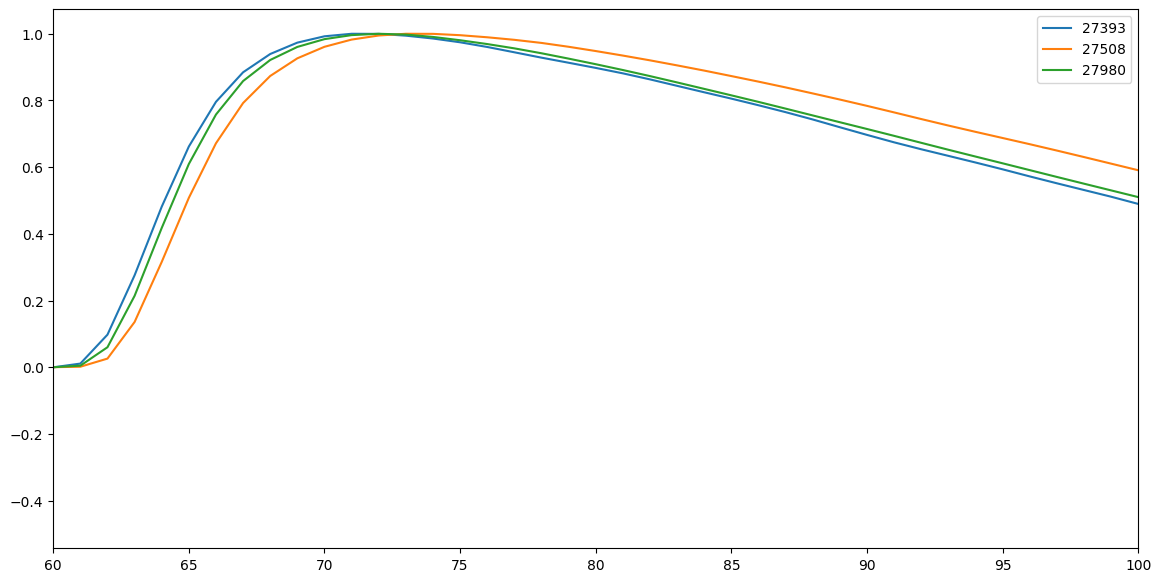

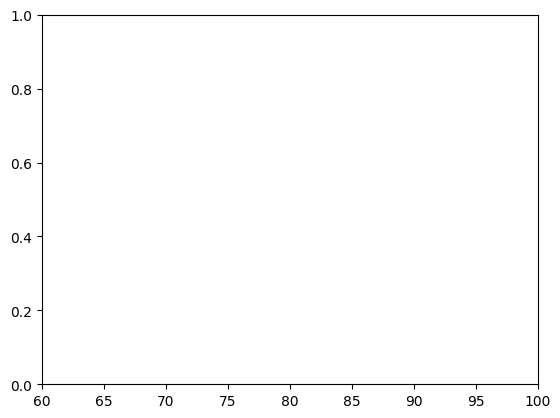

In [20]:
plt.figure(figsize=(14,7))
for r, wf in list(wfsets.items())[:3]:
    # if not (r == 26381 or r == 26440 or r == 26491):
    #     continue
    if r < 27393:
        plt.plot(np.roll(wf.avgwvf, 9, axis=0)/np.max(wf.avgwvf), label=r)
    else:
        plt.plot(wf.avgwvf/np.max(wf.avgwvf), label=r)
plt.legend()
plt.xlim(60,100)
plt.figure()
# persistence_plot(wfsets[25171], 25171)
plt.xlim(60,100)

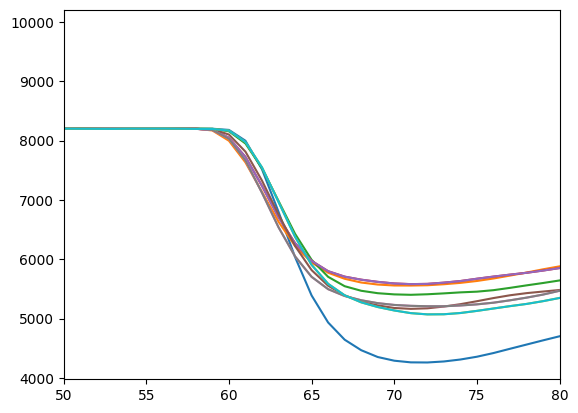

In [32]:
run=25171

plt.hist()
for wvf in wfsets[run].waveforms[:10]:
    plt.plot(wvf.adcs)
    plt.xlim(50,80)

In [33]:
%ls

accept_mapy_responses/      results_beam_fixtemplate/
collect_wf_hdf5_reader.py@  results_beam_new_template_fixtemplate/
convfit.py@                 results_beam_ultimate_fixtemplate/
cuts_response.yaml@         results_fixtemplate/
cuts_template.yaml@         results_new_template_fixtemplate/
deprecated/                 results_ultimate_fixtemplate/
extract_selection.py@       results_wtf_fixtemplate/
graphs/                     runconvfit.sh*
labnotebook.log             runlists/
makeultimatetemplate.py     runselection.sh*
my_func_stats               templates/
__pycache__/                template_selection.ipynb
rawdata/                    test.png
responses/                  Untitled.ipynb
results/                    wtest_hdf5_reader.py
results_beam/
